In [42]:
import pandas as pd
import numpy as np
import FILibExcel
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
excel_path = r"./mock/AntiBio1.xlsx"

In [44]:
tables_dict = FILibExcel.get_all_tables(file_name=excel_path)
df_compounds = tables_dict["TLantTest"]['dataframe']
df_bacterias = tables_dict["Table4"]['dataframe']
df_experiments = tables_dict["Table5"]['dataframe']


worksheet name: Table
tables in worksheet: 0

worksheet name: CompoundsData
tables in worksheet: 1
table name: TLantTest

worksheet name: BacteriasData
tables in worksheet: 1
table name: Table4

worksheet name: ExperimentsData
tables in worksheet: 1
table name: Table5

worksheet name: Legend-Main
tables in worksheet: 1
table name: T_Legend_main

worksheet name: Bac
tables in worksheet: 1
table name: T_Bacteria


In [45]:
df_experiments.head()

,REE,Bacteria,Is salt,Stunting diameter
0,La,Staphylococcus aureus,1,25
1,Ce,Staphylococcus aureus,1,23
2,Pr,Staphylococcus aureus,1,22
3,Sm,Staphylococcus aureus,1,20
4,Eu,Staphylococcus aureus,1,22


In [46]:
df_compounds.head()

,REE,Ionic radii,Electronegativity,Crystal structure type,Coordination number salt,Coordination number solution,рН,lgβ,Electronic structure RE3+,Price
0,La,1.03,2.49,1,11,11,4.44,0.8,600.430.520,138000
1,Ce,1.01,2.61,1,11,11,4.20,0.9,601.43,32790
2,Pr,0.99,2.24,2,10,10,4.51,0.9,602.43,98500
3,Sm,0.96,1.90,2,10,10,5.08,0.9,602.433,97000
4,Eu,0.95,1.81,2,10,10,5.56,0.8,602.434,134500


In [47]:
df_bacterias.head()

,Name,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter min,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,Staphylococcus aureus,1,20,60,1,1,2,0,1,6,1,2,2
1,Escherichia coli,-1,14,18,2,0,1,1,1,15,2,1,1
2,Pseudomonas aeruginosa,-1,14,18,2,0,1,1,1,15,2,1,1
3,Klebsiella pneumoniae,-1,14,18,2,0,1,1,1,15,2,1,1


Let's drop names of compounds and bacteria. Also, we will drop price information because it doesn't affect the target variable. For now, we will drop electronic structure and lgβ because we should make some efforts to interpret them for the model. Membrane pore diameter min is also not interesting for us because it has the same value for all bacteria

In [48]:
df = df_experiments.merge(df_compounds, left_on='REE', right_on='REE').merge(df_bacterias, left_on='Bacteria', right_on='Name')
df = df.drop(['REE', 'Bacteria', 'Membrane pore diameter min', 'Price', 'Name', 'Electronic structure RE3+', 'lgβ'], axis=1)
df.head()

,Is salt,Stunting diameter,Ionic radii,Electronegativity,Crystal structure type,Coordination number salt,Coordination number solution,рН,Gram-stain,Wall thickness min,Wall thickness max,Wall structure,Wall composition 1,Wall composition 2,Outer membrane,Membrane pore diameter max,Proteins,Penicillin sensitivity,Well layers
0,1,25,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
1,0,38,1.03,2.49,1,11,11,4.44,1,20,60,1,1,2,0,6,1,2,2
2,1,23,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
3,0,40,1.01,2.61,1,11,11,4.20,1,20,60,1,1,2,0,6,1,2,2
4,1,22,0.99,2.24,2,10,10,4.51,1,20,60,1,1,2,0,6,1,2,2


In [49]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Is salt,99.0,0.484848,0.502314,0.00,0.000,0.00,1.00,1.00
Stunting diameter,99.0,29.505051,10.562133,0.00,21.000,27.00,40.00,50.00
Ionic radii,99.0,0.924949,0.068383,0.75,0.885,0.92,0.99,1.03
Electronegativity,99.0,2.226263,0.277292,1.78,2.020,2.24,2.49,2.68
Crystal structure type,99.0,3.252525,1.955335,1.00,2.000,2.00,4.50,7.00
Coordination number salt,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
Coordination number solution,99.0,9.373737,1.411222,6.00,9.000,10.00,10.00,11.00
рН,99.0,4.814040,1.203583,1.87,4.440,5.16,5.63,5.96
Gram-stain,99.0,-0.373737,0.932255,-1.00,-1.000,-1.00,1.00,1.00
Wall thickness min,99.0,15.878788,2.796765,14.00,14.000,14.00,20.00,20.00


In [50]:
df.dtypes

Is salt                           int64
Stunting diameter                 int64
Ionic radii                     float64
Electronegativity               float64
Crystal structure type            int64
Coordination number salt          int64
Coordination number solution      int64
рН                              float64
Gram-stain                        int64
Wall thickness min                int64
Wall thickness max                int64
Wall structure                    int64
Wall composition 1                int64
Wall composition 2                int64
Outer membrane                    int64
Membrane pore diameter max        int64
Proteins                          int64
Penicillin sensitivity            int64
Well layers                       int64
dtype: object

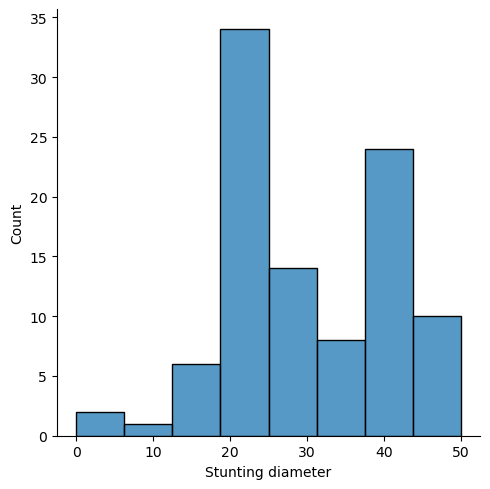

In [51]:
sns.displot(df['Stunting diameter'])

In [52]:
from sklearn.model_selection import train_test_split

X = df.drop('Stunting diameter', axis=1)
y = df['Stunting diameter']


In [53]:
!pip install xgboost

In [54]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
import xgboost as xgb 

In [125]:
def draw_importance(importances, model_name, columns=X.columns):
    features = {}
    for i, feature in enumerate(columns):
        features[f"f{i+1}"] = feature

    indices = np.argsort(importances)[::-1]
    num_to_plot = len(columns)
    feature_indices = [ind + 1 for ind in indices[:num_to_plot]]

    print("Feature ranking:")
    for f in range(num_to_plot):
        print(
            "%d. %s %f "
            % (f + 1, features["f" + str(feature_indices[f])], importances[indices[f]])
        )
    plt.figure(figsize=(20, 10))
    bars = plt.bar(
        range(num_to_plot),
        importances[indices[:num_to_plot]],
        color=([str(i / float(num_to_plot + 1)) for i in range(num_to_plot)]),
        align="center",
    )
    ticks = plt.xticks(range(num_to_plot), feature_indices, fontsize=16)
    plt.yticks(fontsize=20)
    plt.xlim([-1, num_to_plot])
    plt.legend(bars, [u"".join(features["f" + str(i)]) for i in feature_indices], fontsize="20");
    plt.savefig(f'mock/{model_name}.eps', format='eps', dpi=600, bbox_inches='tight', transparent="True", pad_inches=0)
    plt.title(f"Feature importance in {model_name}")
    

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Is salt 0.747050 
2. Crystal structure type 0.037182 
3. Wall thickness max 0.032247 
4. Electronegativity 0.032013 
5. рН 0.031118 
6. Gram-stain 0.026927 
7. Ionic radii  0.021384 
8. Wall thickness min 0.021005 
9. Coordination number solution 0.017896 
10. Coordination number salt 0.017486 
11. Wall structure 0.015693 
12. Penicillin sensitivity 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Well layers 0.000000 


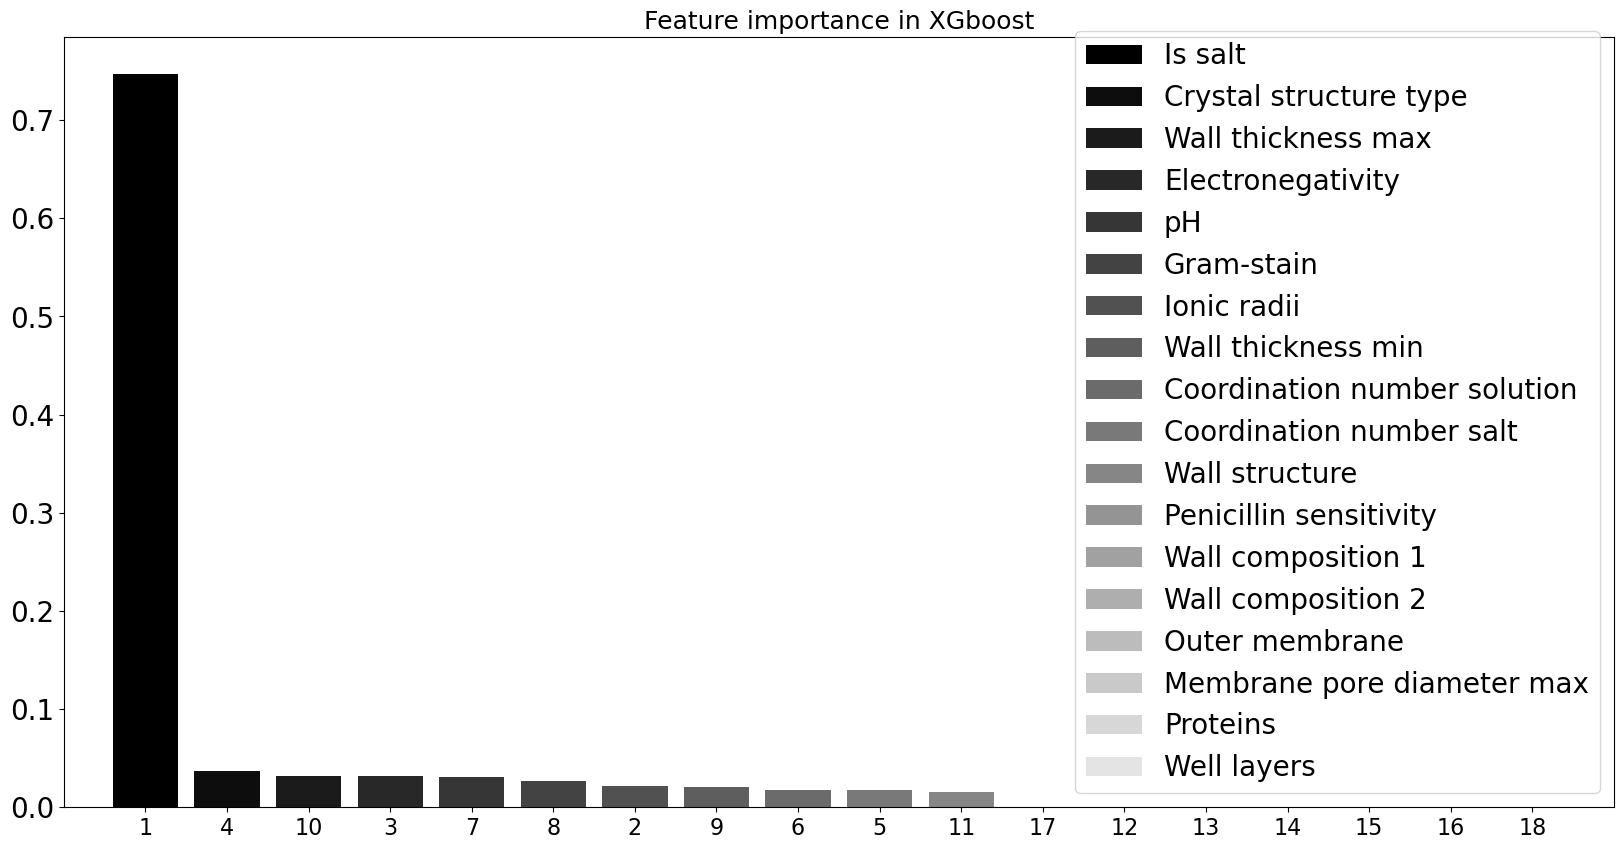

In [126]:
draw_importance(best_xgboost.feature_importances_, "XGboost")

In [34]:
parameters = {
    'n_estimators': range(100, 1000, 50),
    'max_depth': [None] + list(range(3, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_random_forest = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.443499546582283
{'max_depth': 3, 'n_estimators': 100}


Feature ranking:
1. Is salt 0.777727 
2. рН 0.074533 
3. Crystal structure type 0.041025 
4. Electronegativity 0.027559 
5. Coordination number solution 0.020655 
6. Ionic radii  0.014444 
7. Coordination number salt 0.010602 
8. Wall structure 0.004273 
9. Wall composition 2 0.004094 
10. Gram-stain 0.004058 
11. Outer membrane 0.003621 
12. Wall thickness max 0.003233 
13. Wall composition 1 0.003106 
14. Well layers 0.002615 
15. Penicillin sensitivity 0.002575 
16. Wall thickness min 0.002569 
17. Membrane pore diameter max 0.002567 
18. Proteins 0.000744 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


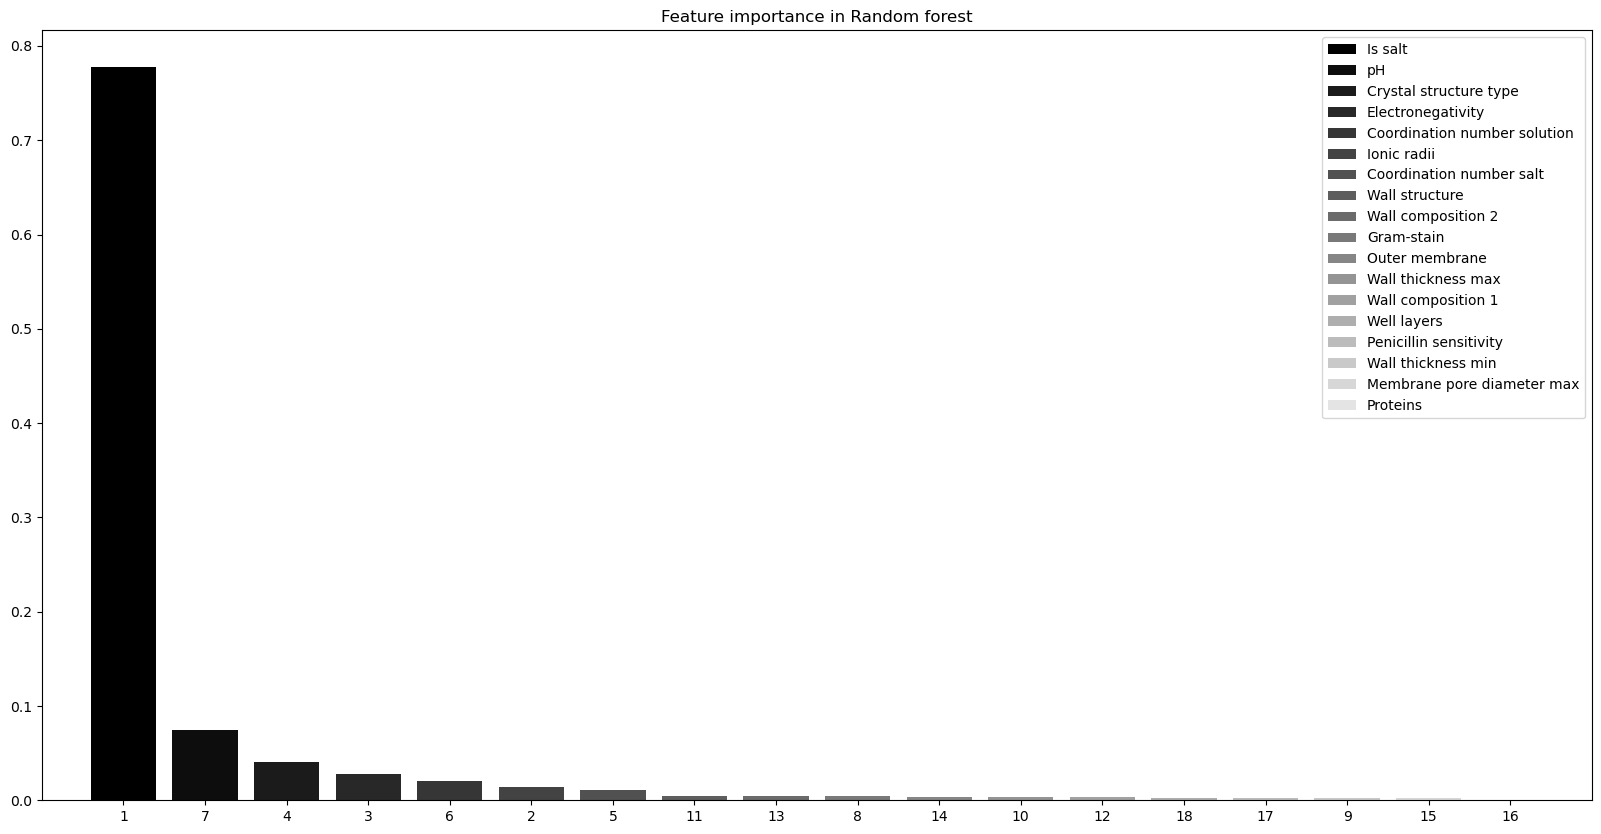

In [111]:
draw_importance(best_random_forest.feature_importances_, "Random forest")

In [38]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_gradient_boost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.522179620846701
{'learning_rate': 0.5, 'max_depth': 1, 'n_estimators': 8}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Is salt 0.900402 
2. рН 0.057571 
3. Crystal structure type 0.042027 
4. Penicillin sensitivity 0.000000 
5. Ionic radii  0.000000 
6. Electronegativity 0.000000 
7. Coordination number salt 0.000000 
8. Coordination number solution 0.000000 
9. Gram-stain 0.000000 
10. Well layers 0.000000 
11. Wall thickness max 0.000000 
12. Wall structure 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Wall thickness min 0.000000 


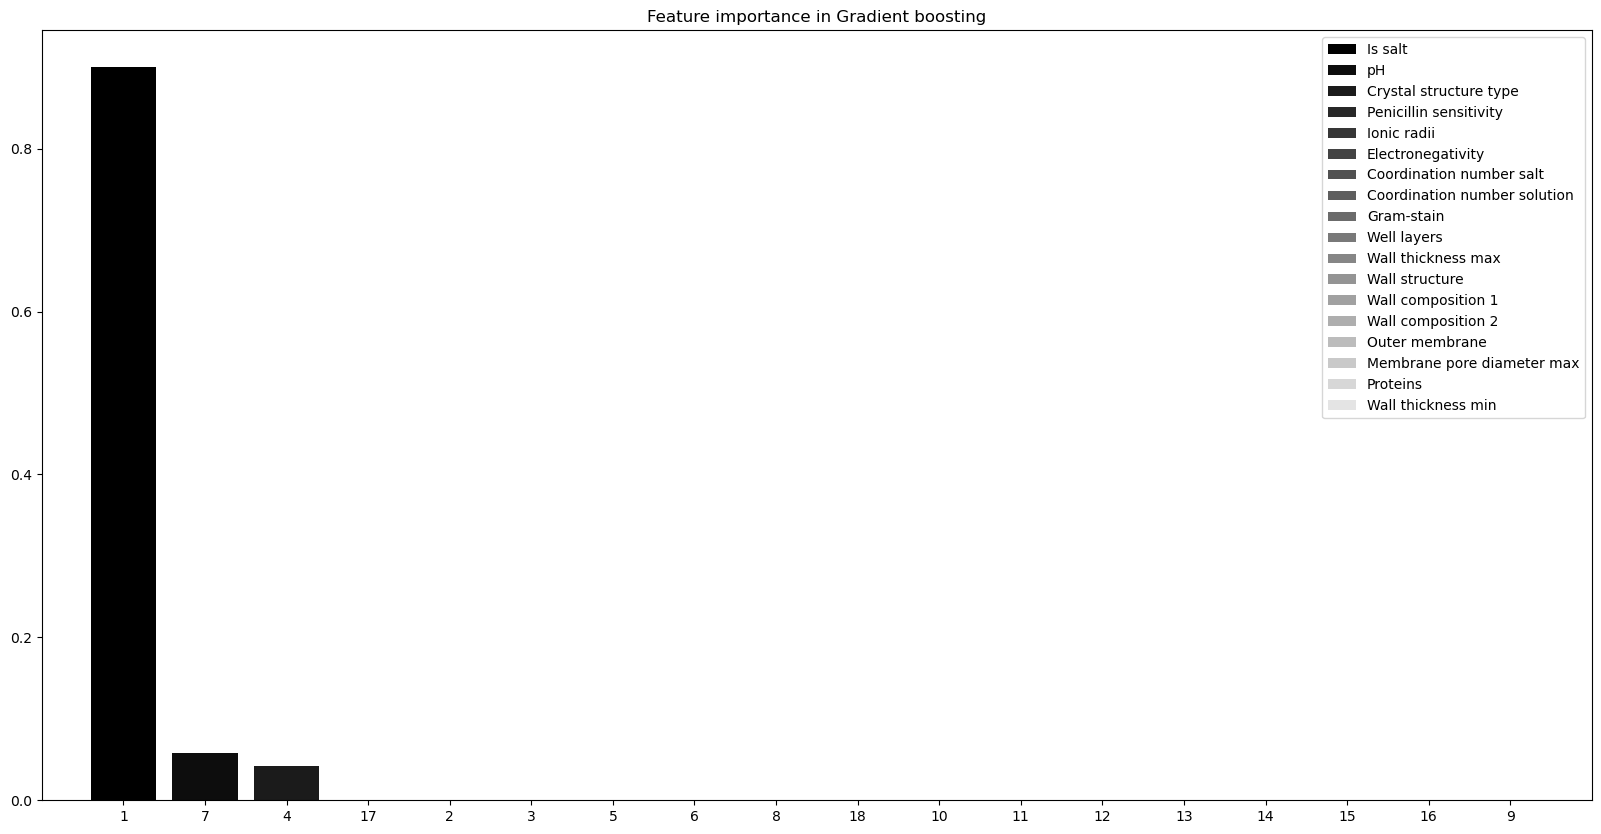

In [112]:
draw_importance(best_gradient_boost.feature_importances_, "Gradient boosting")

In [40]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X, y)
best_xgboost = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.420565213655171
{'colsample_bytree': 0.8, 'gamma': 1, 'max_depth': 3, 'min_child_weight': 17, 'subsample': 1.0}


Feature ranking:
1. Is salt 0.747050 
2. Crystal structure type 0.037182 
3. Wall thickness max 0.032247 
4. Electronegativity 0.032013 
5. рН 0.031118 
6. Gram-stain 0.026927 
7. Ionic radii  0.021384 
8. Wall thickness min 0.021005 
9. Coordination number solution 0.017896 
10. Coordination number salt 0.017486 
11. Wall structure 0.015693 
12. Penicillin sensitivity 0.000000 
13. Wall composition 1 0.000000 
14. Wall composition 2 0.000000 
15. Outer membrane 0.000000 
16. Membrane pore diameter max 0.000000 
17. Proteins 0.000000 
18. Well layers 0.000000 


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


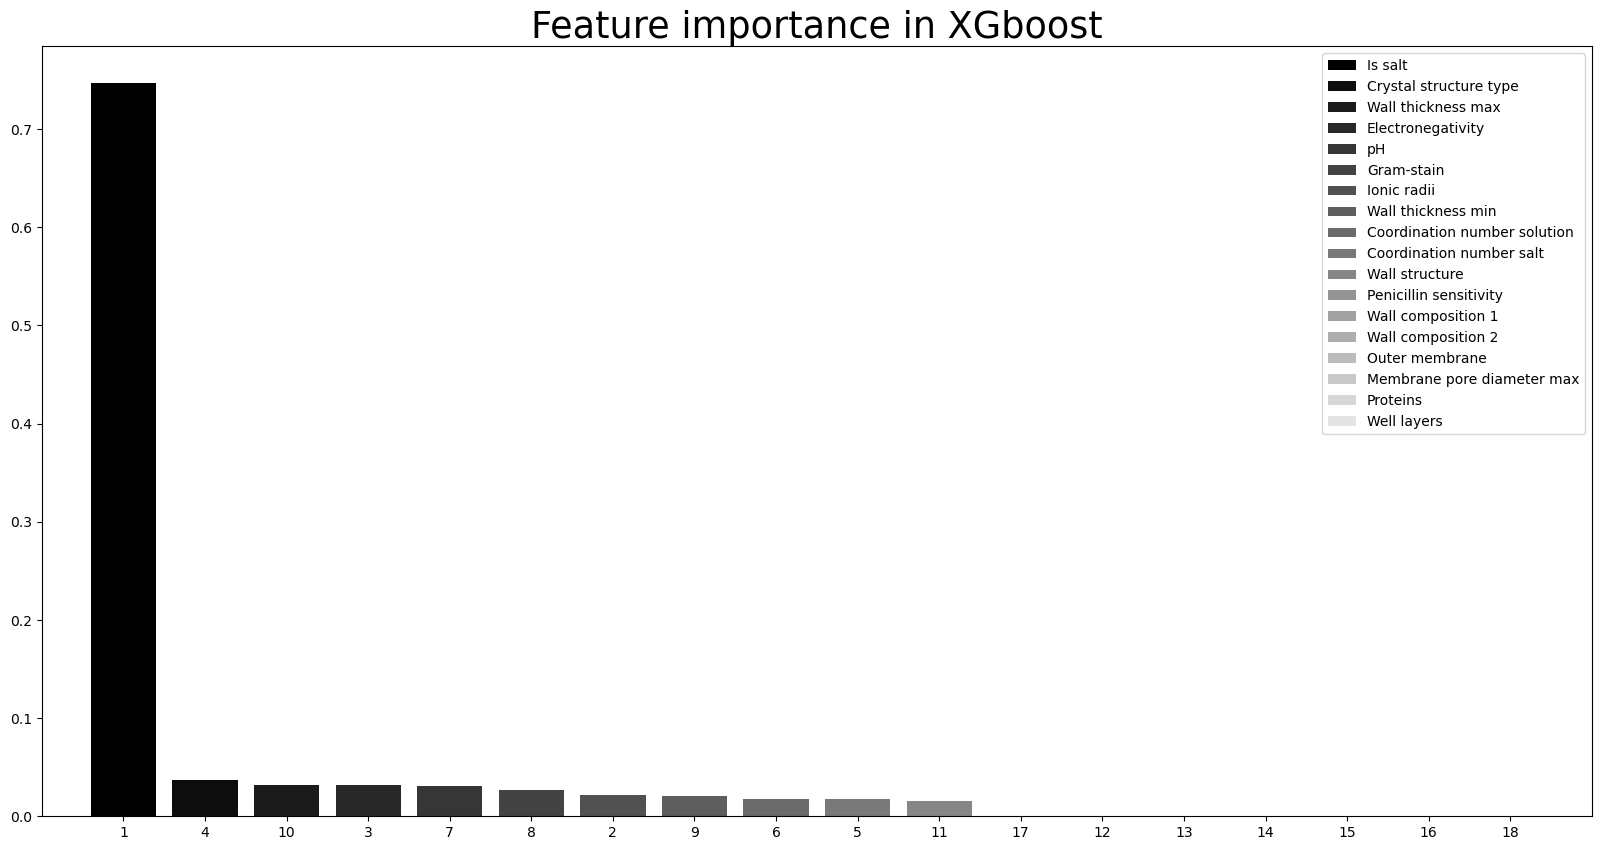

In [115]:
draw_importance(best_xgboost.feature_importances_, "XGboost")

## Сonclusion

We can see, that environment condition where compound take place hardly affect model, so let's split datasets and train to different models for salts and solution.

In [95]:
X_salts = X[X['Is salt'] == 1].drop(['Coordination number solution', 'рН', 'Is salt'], axis=1)
y_salts = y[X['Is salt'] == 1]

X_solution = X[X['Is salt'] == 0].drop(['Coordination number salt', 'Is salt'], axis=1)
y_solution = y[X['Is salt'] == 0]

In [96]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_random_forest_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.8905761854397043
{'max_depth': 1, 'n_estimators': 650}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Crystal structure type 0.410769 
2. Coordination number salt 0.227692 
3. Electronegativity 0.187692 
4. Ionic radii  0.116923 
5. Outer membrane 0.009231 
6. Wall thickness max 0.007692 
7. Wall thickness min 0.007692 
8. Proteins 0.006154 
9. Wall composition 2 0.006154 
10. Gram-stain 0.006154 
11. Well layers 0.003077 
12. Penicillin sensitivity 0.003077 
13. Membrane pore diameter max 0.003077 
14. Wall structure 0.003077 
15. Wall composition 1 0.001538 


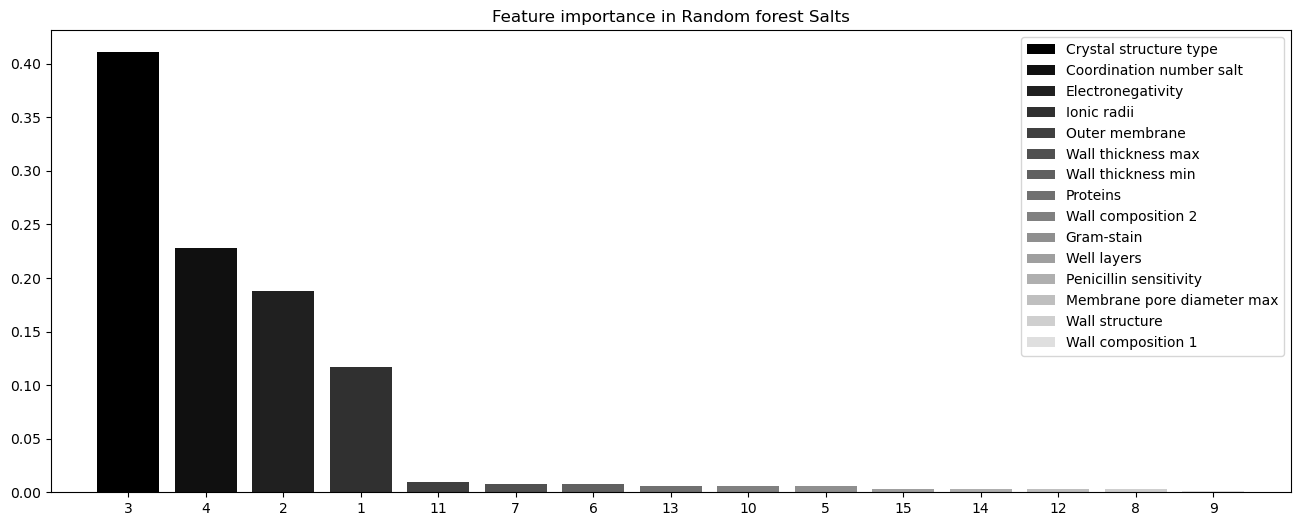

In [97]:
draw_importance(best_random_forest_salts.feature_importances_, "Random forest Salts", X_salts.columns)

In [98]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_gradient_boost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.3980292352186963
{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 2}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Electronegativity 1.000000 
2. Well layers 0.000000 
3. Penicillin sensitivity 0.000000 
4. Proteins 0.000000 
5. Membrane pore diameter max 0.000000 
6. Outer membrane 0.000000 
7. Wall composition 2 0.000000 
8. Wall composition 1 0.000000 
9. Wall structure 0.000000 
10. Wall thickness max 0.000000 
11. Wall thickness min 0.000000 
12. Gram-stain 0.000000 
13. Coordination number salt 0.000000 
14. Crystal structure type 0.000000 
15. Ionic radii  0.000000 


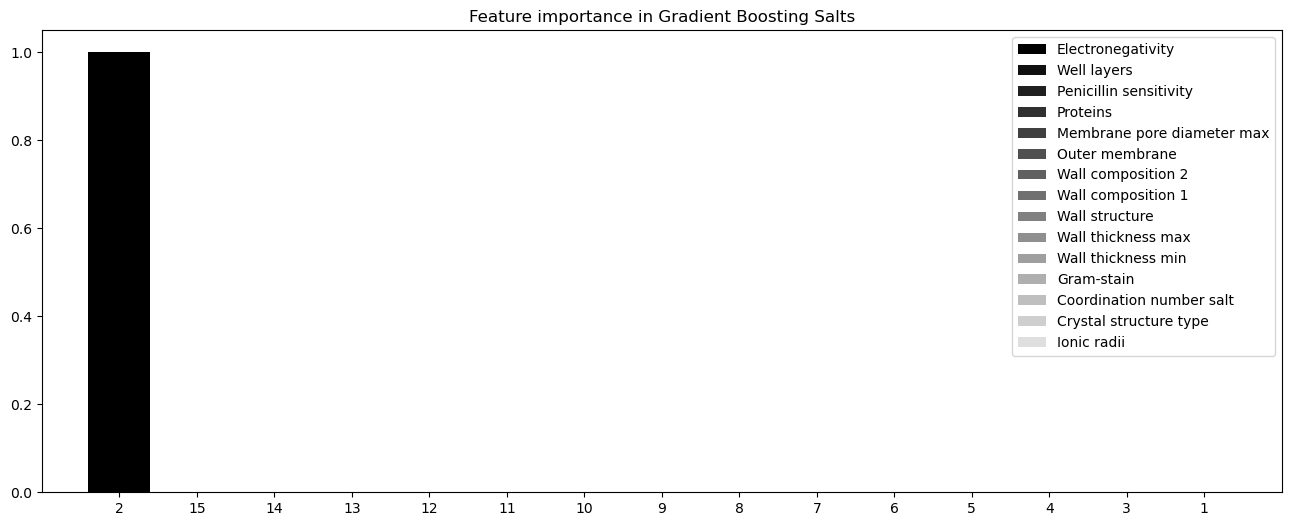

In [99]:
draw_importance(best_gradient_boost_salts.feature_importances_, "Gradient Boosting Salts", X_salts.columns)

In [100]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15,],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_salts, y_salts)
best_xgboost_salts = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-3.3954621124267574
{'colsample_bytree': 0.8, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 15, 'subsample': 0.6}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Electronegativity 0.286241 
2. Ionic radii  0.255532 
3. Coordination number salt 0.249955 
4. Crystal structure type 0.208272 
5. Well layers 0.000000 
6. Penicillin sensitivity 0.000000 
7. Proteins 0.000000 
8. Membrane pore diameter max 0.000000 
9. Outer membrane 0.000000 
10. Wall composition 2 0.000000 
11. Wall composition 1 0.000000 
12. Wall structure 0.000000 
13. Wall thickness max 0.000000 
14. Wall thickness min 0.000000 
15. Gram-stain 0.000000 


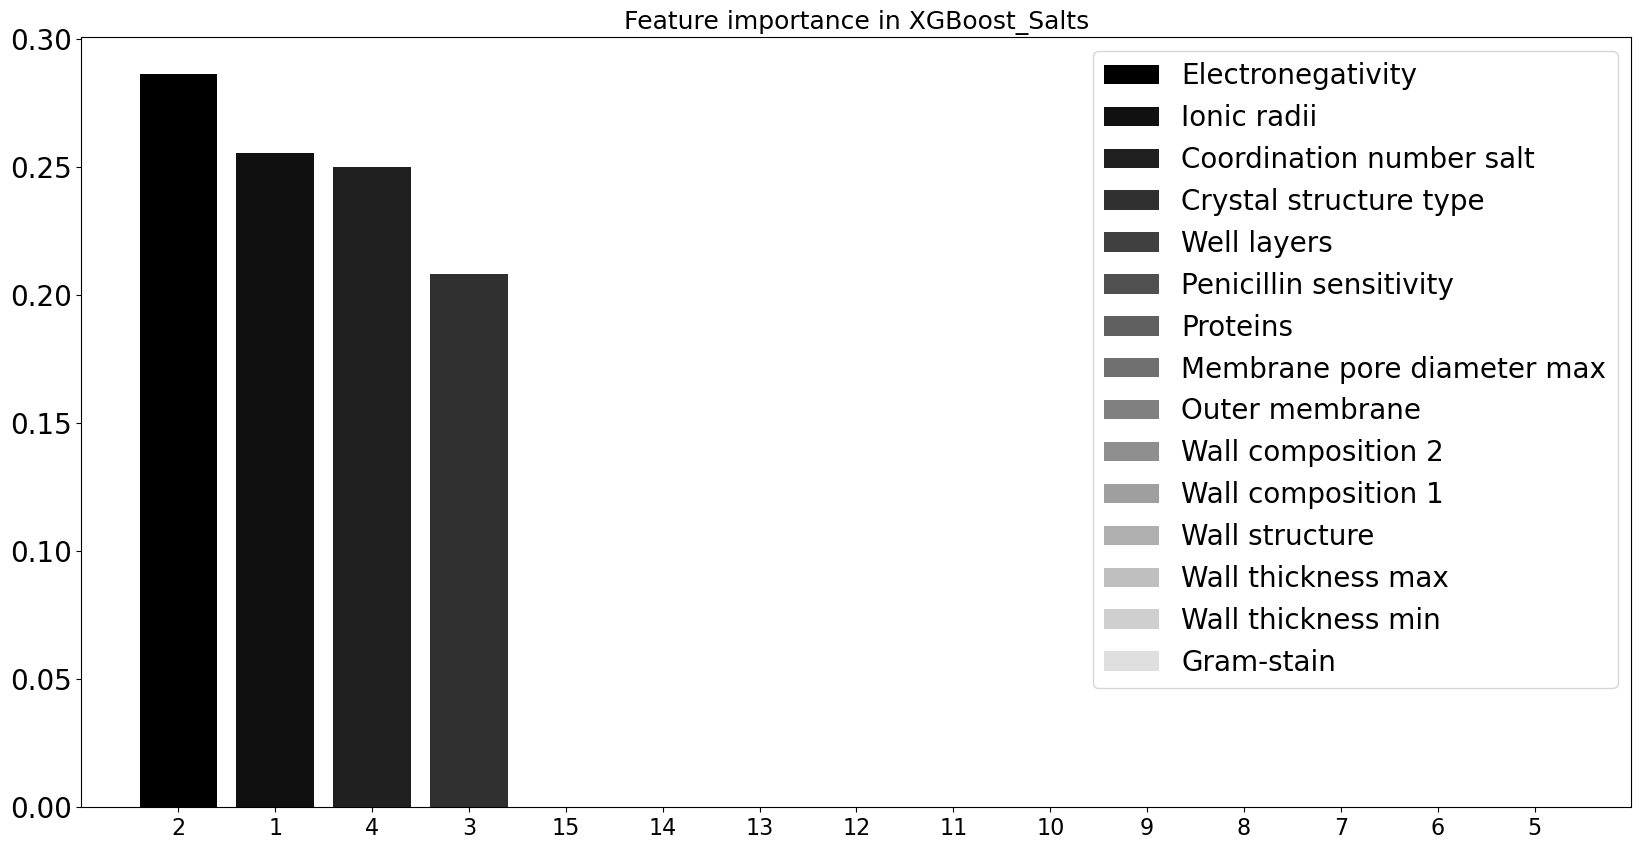

In [130]:
draw_importance(best_xgboost_salts.feature_importances_, "XGBoost_Salts", X_salts.columns)

In [102]:
parameters = {
    'n_estimators': range(50, 1000, 50),
    'max_depth': [None] + list(range(1, 15, 1))}

model = RandomForestRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_random_forest_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.616200605993607
{'max_depth': 3, 'n_estimators': 250}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. рН 0.331254 
2. Electronegativity 0.143486 
3. Crystal structure type 0.137081 
4. Ionic radii  0.110704 
5. Coordination number solution 0.107223 
6. Wall composition 2 0.021812 
7. Wall thickness min 0.019822 
8. Outer membrane 0.019778 
9. Well layers 0.017649 
10. Wall composition 1 0.015625 
11. Gram-stain 0.014769 
12. Wall thickness max 0.013732 
13. Penicillin sensitivity 0.013233 
14. Wall structure 0.011857 
15. Proteins 0.011786 
16. Membrane pore diameter max 0.010187 


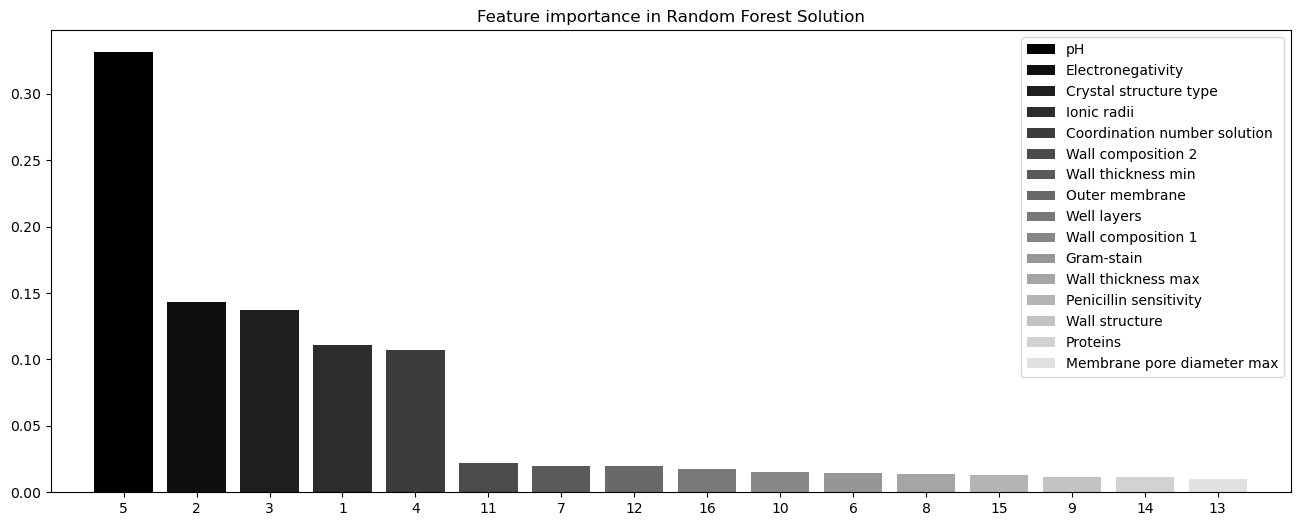

In [103]:
draw_importance(best_random_forest_solution.feature_importances_, "Random Forest Solution", X_solution.columns)

In [104]:
parameters = {
    'learning_rate': [0.5, 0.25, 0.1, 0.05, 0.01],
    'n_estimators': [2, 4, 8, 16, 32, 64, 100, 200, 300, 400],
    'max_depth': range(1, 18, 1)}

model = GradientBoostingRegressor(random_state=42)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_gradient_boost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.1994356538524995
{'learning_rate': 0.05, 'max_depth': 3, 'n_estimators': 32}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. рН 0.408658 
2. Ionic radii  0.242374 
3. Electronegativity 0.122518 
4. Coordination number solution 0.031942 
5. Gram-stain 0.029614 
6. Wall structure 0.025678 
7. Crystal structure type 0.024841 
8. Wall composition 2 0.022511 
9. Penicillin sensitivity 0.019782 
10. Wall thickness max 0.014187 
11. Proteins 0.012947 
12. Wall composition 1 0.012632 
13. Membrane pore diameter max 0.011852 
14. Outer membrane 0.010126 
15. Well layers 0.005327 
16. Wall thickness min 0.005011 


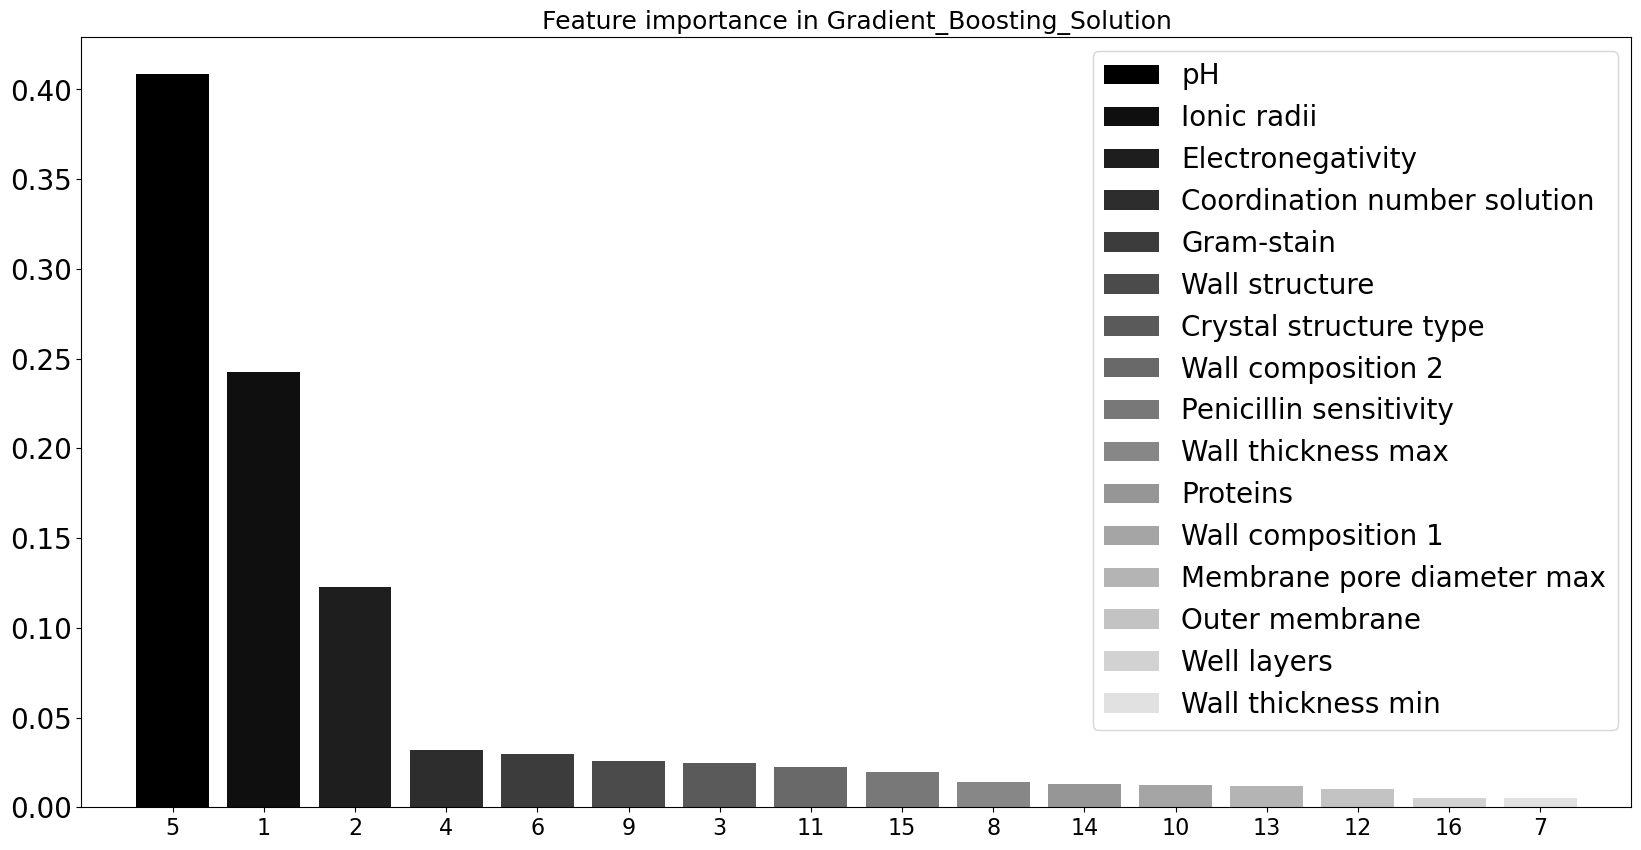

In [129]:
draw_importance(best_gradient_boost_solution.feature_importances_, "Gradient_Boosting_Solution", X_solution.columns)

In [106]:
parameters = {
    'min_child_weight': [1, 5, 7, 10, 11, 12, 15, 17, 18, 20],
    'gamma': [0.5, 1, 1.5, 2, 2.5, 3, 5],
    'subsample': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'colsample_bytree': [0.3, 0.4, 0.5, 0.6, 0.8, 1.0],
    'max_depth': [3, 4, 5]
}

model = xgb.XGBRegressor(learning_rate=0.02, n_estimators=600, nthread=1, seed=0)
clf = GridSearchCV(
    model, 
    parameters, 
    cv=5, 
    scoring='neg_mean_absolute_error',
    refit=True,
    n_jobs=-1)
clf.fit(X_solution, y_solution)
best_xgboost_solution = clf.best_estimator_
print(clf.best_score_)
print(clf.best_params_)

-4.837208872708407
{'colsample_bytree': 1.0, 'gamma': 0.5, 'max_depth': 4, 'min_child_weight': 5, 'subsample': 0.4}


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


Feature ranking:
1. Coordination number solution 0.395780 
2. Crystal structure type 0.165038 
3. рН 0.135873 
4. Gram-stain 0.103851 
5. Ionic radii  0.102469 
6. Electronegativity 0.096990 
7. Well layers 0.000000 
8. Penicillin sensitivity 0.000000 
9. Proteins 0.000000 
10. Membrane pore diameter max 0.000000 
11. Outer membrane 0.000000 
12. Wall composition 2 0.000000 
13. Wall composition 1 0.000000 
14. Wall structure 0.000000 
15. Wall thickness max 0.000000 
16. Wall thickness min 0.000000 


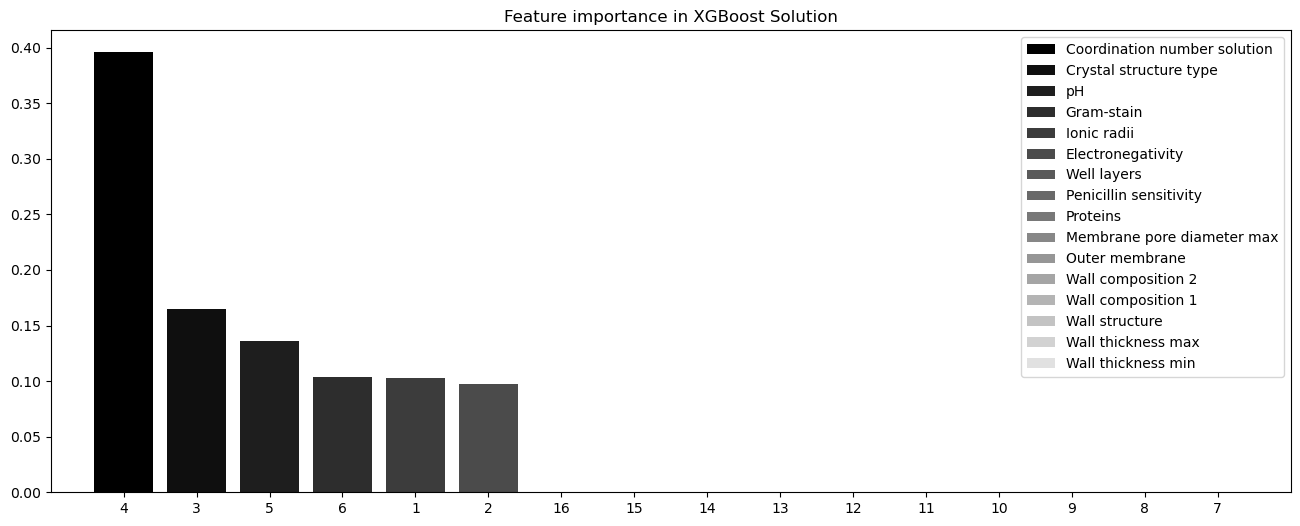

In [107]:
draw_importance(best_xgboost_solution.feature_importances_, "XGBoost Solution", X_solution.columns)